##  Importar bibliotecas relevantes

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from datetime import datetime
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes


from sklearn.metrics import roc_curve

from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve


## Cargar Datasets


In [56]:
Clientes_Diciembre = pd.read_csv('clientes_diciembre.csv',sep = '|')
Consumos_Diciembre = pd.read_csv('consumos_diciembre.csv',sep = '|')
Financiacion_Diciembre = pd.read_csv('financiacion_diciembre.csv',sep = '|')
Productos_Diciembre = pd.read_csv('productos_diciembre.csv',sep = '|')

Clientes_Enero = pd.read_csv('clientes_enero.csv',sep = '|')
Consumos_Enero = pd.read_csv('consumos_enero.csv',sep = '|')
Financiacion_Enero = pd.read_csv('financiacion_enero.csv',sep = '|')
Productos_Enero = pd.read_csv('productos_enero.csv',sep = '|')

In [57]:
Diciembre = [Clientes_Diciembre,Consumos_Diciembre,Financiacion_Diciembre,Productos_Diciembre]
Enero = [Clientes_Enero,Consumos_Enero,Financiacion_Enero,Productos_Enero]

In [58]:
df_diciembre = reduce(lambda left,right:pd.merge(left,right, on = ['id'],how='left'),Diciembre)
df_enero = reduce(lambda left,right:pd.merge(left,right, on = ['id'],how='left'),Enero)

### Target

In [59]:
df_churn=df_diciembre

In [60]:
# Reviso si hay duplicados
boolean = df_churn['id'].duplicated().any()
boolean 

False

In [61]:
Fuga= (~Clientes_Diciembre['id'].isin(Clientes_Enero['id'])).astype('int')
df_churn.insert(1,'Fuga',Fuga) 

In [62]:
df_churn['Fuga'].value_counts()

0    88382
1     7085
Name: Fuga, dtype: int64

In [63]:
df_churn.head(10)

,id,Fuga,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,0,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,NaN,NaN,NaN,FIBRA,50MB,tv-futbol
1,2,0,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,NaN,NaN,SI,FIBRA,600MB,tv-futbol
2,3,0,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,129,30,15511,17013,16743,NaN,NaN,SI,ADSL,35MB,tv-futbol
3,4,0,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,51,52,12670,3393,6771,NaN,NaN,NaN,FIBRA,200MB,tv-familiar
4,5,1,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,NaN,NaN,NaN,ADSL,10MB,tv-futbol
5,6,0,51,99.348645,1997-11-04 11:43:00,Huelva,4,NaN,NaN,204,51,18428,8956,4764,NaN,NaN,NaN,FIBRA,200MB,tv-futbol
6,7,0,55,88.062883,1996-06-14 01:44:00,Lérida,4,NaN,NaN,217,43,80,16406,19797,SI,31.553269,NaN,ADSL,25MB,tv-futbol
7,8,0,21,73.076377,2004-07-02 12:35:00,La Coruña,4,NaN,NaN,38,73,19850,11503,19279,NaN,NaN,NaN,ADSL,30MB,tv-futbol
8,9,0,30,395.481514,2018-03-26 22:22:00,Alicante,3,NaN,NaN,5,74,4854,19518,382,NaN,NaN,NaN,ADSL,35MB,tv-total
9,10,1,23,378.134025,2000-02-18 13:23:00,Madrid,5,1.0,NaN,35,89,10188,8889,4748,NaN,NaN,NaN,ADSL,600MB,tv-total


### Preprocesar Datos

In [64]:
df_enero['antiguedad']

0        11/23/2018 08:48 AM
1        08/22/2017 03:19 AM
2        12/27/2001 01:50 PM
3        08/08/2015 10:53 AM
4        11/04/1997 11:43 AM
                ...         
92706    04/09/2013 01:33 PM
92707    08/08/2003 11:57 PM
92708    03/27/2013 08:07 PM
92709    01/18/2020 02:30 AM
92710    10/22/2009 07:17 PM
Name: antiguedad, Length: 92711, dtype: object

In [65]:
df_diciembre['antiguedad']=pd.to_datetime(df_diciembre['antiguedad'])
df_enero['antiguedad']=pd.to_datetime(df_enero['antiguedad'])

In [66]:
df_enero['antiguedad']

0       2018-11-23 08:48:00
1       2017-08-22 03:19:00
2       2001-12-27 13:50:00
3       2015-08-08 10:53:00
4       1997-11-04 11:43:00
                ...        
92706   2013-04-09 13:33:00
92707   2003-08-08 23:57:00
92708   2013-03-27 20:07:00
92709   2020-01-18 02:30:00
92710   2009-10-22 19:17:00
Name: antiguedad, Length: 92711, dtype: datetime64[ns]

In [67]:
df_diciembre['antiguedad']

0       2018-11-23 08:48:00
1       2017-08-22 03:19:00
2       2001-12-27 13:50:00
3       2015-08-08 10:53:00
4       1997-08-29 02:19:00
                ...        
95462   2019-03-05 00:00:00
95463   2013-04-09 13:33:00
95464   2003-08-08 23:57:00
95465   2013-03-27 20:07:00
95466   2009-10-22 19:17:00
Name: antiguedad, Length: 95467, dtype: datetime64[ns]

In [68]:
df_enero['provincia'].unique()

array(['La Rioja', 'Vizcaya', 'Albacete', 'Lugo', 'Huelva', 'Lérida',
       'La Coruña', 'Alicante', 'Córdoba', 'Las Palmas', 'Soria',
       'Zamora', 'Granada', 'Palencia', 'Burgos', 'Teruel', 'Navarra',
       'Guipúzcoa', 'Valencia', 'Málaga', 'Sevilla', 'Huesca',
       'Valladolid', 'Cádiz', 'Jaén', 'Cuenca', 'Badajoz', 'Almería',
       'Ciudad Real', 'Salamanca', 'Segovia', 'Tarragona', 'Asturias',
       'Islas Baleares', 'Álava', 'Cáceres', 'Cantabria', 'Zaragoza',
       'Murcia', 'León', 'Toledo', 'Pontevedra', 'Guadalajara', 'Ávila',
       'Santa Cruz de Tenerife', 'Castellón', 'Madrid', 'Gerona',
       'Barcelona', 'Orense'], dtype=object)

In [69]:
df_churn['provincia'].unique()

array(['La Rioja', 'Vizcaya', 'Albacete', 'Lugo', 'Tarragona', 'Huelva',
       'Lérida', 'La Coruña', 'Alicante', 'Madrid', 'Córdoba',
       'Las Palmas', 'Soria', 'Zamora', 'Valladolid', 'Granada',
       'Palencia', 'Burgos', 'Teruel', 'Navarra', 'Guipúzcoa', 'Valencia',
       'Málaga', 'Sevilla', 'Huesca', 'Cádiz', 'Jaén', 'Cuenca',
       'Badajoz', 'Almería', 'Ciudad Real', 'Salamanca', 'Pontevedra',
       'Segovia', 'Asturias', 'Islas Baleares', 'Álava', 'Cáceres',
       'Orense', 'Cantabria', 'Zaragoza', 'Murcia', 'León', 'Toledo',
       'Guadalajara', 'Ávila', 'Santa Cruz de Tenerife', 'Castellón',
       'Gerona', 'Barcelona'], dtype=object)

In [70]:
df_churn['provincia'] = df_churn['provincia'].replace({'Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'},'Andalucía')
df_churn['provincia'] = df_churn['provincia'].replace({'Huesca','Teruel','Zaragoza'},'Aragón')
df_churn['provincia'] = df_churn['provincia'].replace({'Asturias'},'Principado de Asturias')
df_churn['provincia'] = df_churn['provincia'].replace({'Islas Baleares'},'Islas Baleares')
df_churn['provincia'] = df_churn['provincia'].replace({'Las Palmas','Santa Cruz de Tenerife'},'Canarias')
df_churn['provincia'] = df_churn['provincia'].replace({'Cantabria'},'Cantabria')
df_churn['provincia'] = df_churn['provincia'].replace({'Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'},'Castilla-La Mancha')
df_churn['provincia'] = df_churn['provincia'].replace({'Ávila','Burgos','León','Palencia','Salamanca','Segovia','Soria','Valladolid','Zamora'},'Castilla y Léon')
df_churn['provincia'] = df_churn['provincia'].replace({'Barcelona','Gerona','Lérida','Tarragona'},'Cataluña')
df_churn['provincia'] = df_churn['provincia'].replace({'Alicante','Castellón','Valencia'},'Comunidad Valenciana')
df_churn['provincia'] = df_churn['provincia'].replace({'Badajoz','Cáceres'},'Extremadura')
df_churn['provincia'] = df_churn['provincia'].replace({'La Rioja'},'La Rioja')
df_churn['provincia'] = df_churn['provincia'].replace({'Madrid'},'Comunidad de Madrid')
df_churn['provincia'] = df_churn['provincia'].replace({'Murcia'},'Región de Murcia')
df_churn['provincia'] = df_churn['provincia'].replace({'Navarra'},'Comunidad Foral de Navarra')
df_churn['provincia'] = df_churn['provincia'].replace({'La Coruña','Lugo','Orense','Pontevedra'},'Galicia')
df_churn['provincia'] = df_churn['provincia'].replace({'Álava','Guipúzcoa','Vizcaya'},'País Vasco')

df_enero['provincia'] = df_enero['provincia'].replace({'Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'},'Andalucía')
df_enero['provincia'] = df_enero['provincia'].replace({'Huesca','Teruel','Zaragoza'},'Aragón')
df_enero['provincia'] = df_enero['provincia'].replace({'Asturias'},'Principado de Asturias')
df_enero['provincia'] = df_enero['provincia'].replace({'Islas Baleares'},'Islas Baleares')
df_enero['provincia'] = df_enero['provincia'].replace({'Las Palmas','Santa Cruz de Tenerife'},'Canarias')
df_enero['provincia'] = df_enero['provincia'].replace({'Cantabria'},'Cantabria')
df_enero['provincia'] = df_enero['provincia'].replace({'Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'},'Castilla-La Mancha')
df_enero['provincia'] = df_enero['provincia'].replace({'Ávila','Burgos','León','Palencia','Salamanca','Segovia','Soria','Valladolid','Zamora'},'Castilla y Léon')
df_enero['provincia'] = df_enero['provincia'].replace({'Barcelona','Gerona','Lérida','Tarragona'},'Cataluña')
df_enero['provincia'] = df_enero['provincia'].replace({'Alicante','Castellón','Valencia'},'Comunidad Valenciana')
df_enero['provincia'] = df_enero['provincia'].replace({'Badajoz','Cáceres'},'Extremadura')
df_enero['provincia'] = df_enero['provincia'].replace({'La Rioja'},'La Rioja')
df_enero['provincia'] = df_enero['provincia'].replace({'Madrid'},'Comunidad de Madrid')
df_enero['provincia'] = df_enero['provincia'].replace({'Murcia'},'Región de Murcia')
df_enero['provincia'] = df_enero['provincia'].replace({'Navarra'},'Comunidad Foral de Navarra')
df_enero['provincia'] = df_enero['provincia'].replace({'La Coruña','Lugo','Orense','Pontevedra'},'Galicia')
df_enero['provincia'] = df_enero['provincia'].replace({'Álava','Guipúzcoa','Vizcaya'},'País Vasco')

In [71]:
df_churn['provincia'].unique()

array(['La Rioja', 'País Vasco', 'Castilla-La Mancha', 'Galicia',
       'Cataluña', 'Andalucía', 'Comunidad Valenciana',
       'Comunidad de Madrid', 'Canarias', 'Castilla y Léon', 'Aragón',
       'Comunidad Foral de Navarra', 'Extremadura',
       'Principado de Asturias', 'Islas Baleares', 'Cantabria',
       'Región de Murcia'], dtype=object)

In [72]:
df_churn.rename(columns={'provincia':'Comunidad'},inplace=True)
df_enero.rename(columns={'provincia':'Comunidad'},inplace=True)

In [73]:
ahora = datetime(2019,12,31,23,59)
ahora=pd.to_datetime(ahora)
duracion = ahora - df_diciembre['antiguedad']
duracion = duracion.dt.floor('d')
df_churn['antiguedad'] = duracion
df_churn.head(10)


,id,Fuga,edad,facturacion,antiguedad,Comunidad,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,0,63,216.028109,403 days,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,NaN,NaN,NaN,FIBRA,50MB,tv-futbol
1,2,0,84,255.830842,861 days,País Vasco,3,NaN,NaN,189,89,18657,6499,10862,NaN,NaN,SI,FIBRA,600MB,tv-futbol
2,3,0,66,135.768153,6578 days,Castilla-La Mancha,4,NaN,NaN,129,30,15511,17013,16743,NaN,NaN,SI,ADSL,35MB,tv-futbol
3,4,0,69,255.658527,1606 days,Galicia,4,NaN,NaN,51,52,12670,3393,6771,NaN,NaN,NaN,FIBRA,200MB,tv-familiar
4,5,1,30,22.302845,8159 days,Cataluña,2,2.0,NaN,183,3,23756,18436,4485,NaN,NaN,NaN,ADSL,10MB,tv-futbol
5,6,0,51,99.348645,8092 days,Andalucía,4,NaN,NaN,204,51,18428,8956,4764,NaN,NaN,NaN,FIBRA,200MB,tv-futbol
6,7,0,55,88.062883,8600 days,Cataluña,4,NaN,NaN,217,43,80,16406,19797,SI,31.553269,NaN,ADSL,25MB,tv-futbol
7,8,0,21,73.076377,5660 days,Galicia,4,NaN,NaN,38,73,19850,11503,19279,NaN,NaN,NaN,ADSL,30MB,tv-futbol
8,9,0,30,395.481514,645 days,Comunidad Valenciana,3,NaN,NaN,5,74,4854,19518,382,NaN,NaN,NaN,ADSL,35MB,tv-total
9,10,1,23,378.134025,7256 days,Comunidad de Madrid,5,1.0,NaN,35,89,10188,8889,4748,NaN,NaN,NaN,ADSL,600MB,tv-total


In [74]:
ahora_enero = datetime(2020,1,31,23,59)
ahora_enero=pd.to_datetime(ahora_enero)

duracion2 = ahora_enero - df_enero['antiguedad']
duracion2 = duracion2.dt.floor('d')
df_enero['antiguedad'] = duracion2
df_enero

,id,edad,facturacion,antiguedad,Comunidad,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,434 days,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,NaN,NaN,NaN,FIBRA,50MB,tv-futbol
1,2,84,255.830842,892 days,País Vasco,3,NaN,NaN,44,36,14471,14541,8016,NaN,NaN,SI,FIBRA,600MB,tv-futbol
2,3,66,135.768153,6609 days,Castilla-La Mancha,4,NaN,NaN,94,27,1428,5248,7106,NaN,NaN,SI,ADSL,35MB,tv-futbol
3,4,69,255.658527,1637 days,Galicia,4,NaN,NaN,186,20,20083,7372,5052,NaN,NaN,NaN,FIBRA,200MB,tv-familiar
4,6,51,99.348645,8123 days,Andalucía,4,NaN,NaN,37,32,19078,5009,8686,NaN,NaN,NaN,FIBRA,200MB,tv-futbol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92706,99996,36,215.890326,2488 days,Castilla-La Mancha,3,NaN,NaN,217,96,9059,7735,8823,NaN,NaN,NaN,ADSL,30MB,tv-futbol
92707,99997,68,285.890750,6020 days,Principado de Asturias,5,NaN,NaN,168,99,9303,4798,3996,SI,14.616422,NaN,FIBRA,200MB,tv-futbol
92708,99998,20,383.167610,2501 days,País Vasco,4,NaN,NaN,188,71,19018,1237,16720,NaN,NaN,NaN,ADSL,20MB,tv-futbol
92709,99999,53,53.301395,13 days,Andalucía,2,NaN,NaN,138,40,20264,10552,17637,NaN,NaN,NaN,FIBRA,50MB,tv-futbol


In [75]:
df_churn.dtypes

id                          int64
Fuga                        int32
edad                        int64
facturacion               float64
antiguedad        timedelta64[ns]
Comunidad                  object
num_lineas                  int64
num_dt                    float64
incidencia                 object
num_llamad_ent              int64
num_llamad_sal              int64
mb_datos                    int64
seg_llamad_ent              int64
seg_llamad_sal              int64
financiacion               object
imp_financ                float64
descuentos                 object
conexion                   object
vel_conexion               object
TV                         object
dtype: object

In [76]:
df_churn[['num_dt','imp_financ']] = df_churn[['num_dt','imp_financ']].fillna(0)
df_churn[['incidencia','financiacion','descuentos']] = df_churn[['incidencia','financiacion','descuentos']].fillna('No')


df_enero[['num_dt','imp_financ']] = df_enero[['num_dt','imp_financ']].fillna(0)
df_enero[['incidencia','financiacion','descuentos']] = df_enero[['incidencia','financiacion','descuentos']].fillna('No')


In [77]:
df_churn['vel_conexion'].unique()

array(['50MB', '600MB', '35MB', '200MB', '10MB', '25MB', '30MB', '100MB',
       '16598', '20MB', '300MB', '15MB', nan, '1', '?'], dtype=object)

In [78]:
df_enero['vel_conexion'].unique()

array(['50MB', '600MB', '35MB', '200MB', '25MB', '30MB', '10MB', '100MB',
       '20MB', '300MB', '15MB', nan], dtype=object)

Se remueven los caracteres de MB y reemplazo los Nan, ?,1,'' y el 16598 que son elementos anomalos.

In [79]:
df_churn['vel_conexion'] = df_churn['vel_conexion'].str.replace(r'\D','')
df_enero['vel_conexion'] = df_enero['vel_conexion'].str.replace(r'\D','')

<ipython-input-79-f49f7e2de96d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_churn['vel_conexion'] = df_churn['vel_conexion'].str.replace(r'\D','')
<ipython-input-79-f49f7e2de96d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_enero['vel_conexion'] = df_enero['vel_conexion'].str.replace(r'\D','')


In [80]:
df_churn['vel_conexion'].fillna(df_churn['vel_conexion'].mode()[0], inplace=True)
df_enero['vel_conexion'].fillna(df_enero['vel_conexion'].mode()[0], inplace=True)

df_churn['vel_conexion'] = df_churn['vel_conexion'].replace({'?','1','',16598},200)


Se convierte a entero

In [81]:
df_churn['vel_conexion'] = df_churn['vel_conexion'].astype(str).astype(int)
df_enero['vel_conexion'] = df_enero['vel_conexion'].astype(str).astype(int)

Reviso que no queden NAs

In [82]:

df_churn.isna().any()

id                False
Fuga              False
edad              False
facturacion       False
antiguedad        False
Comunidad         False
num_lineas        False
num_dt            False
incidencia        False
num_llamad_ent    False
num_llamad_sal    False
mb_datos          False
seg_llamad_ent    False
seg_llamad_sal    False
financiacion      False
imp_financ        False
descuentos        False
conexion          False
vel_conexion      False
TV                False
dtype: bool

Quizas aca podrian ir unos grafiquitos

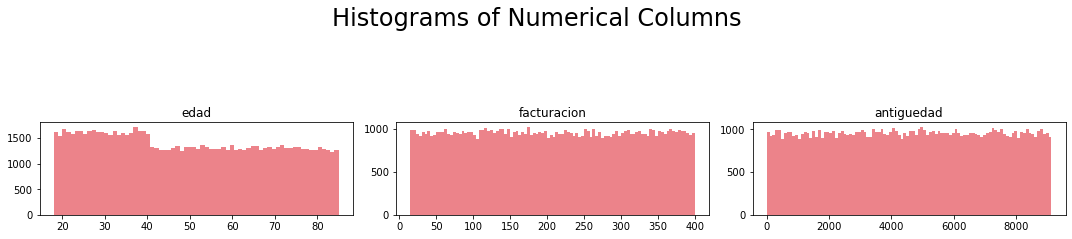

In [147]:
dataset2 = df_churn[['edad', 'facturacion', 'antiguedad']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [83]:
df_churn['imp_financ'].unique()

array([ 0.        , 31.55326856, 28.51874706, ..., 28.35559612,
       23.13877851, 14.61642214])

In [84]:
df_churn['incidencia'].unique()

array(['No', 'SI'], dtype=object)

In [85]:
df_churn['financiacion'].unique()

array(['No', 'SI'], dtype=object)

In [86]:
df_churn['descuentos'].unique()

array(['No', 'SI'], dtype=object)

Convertir a dummies

In [87]:

df_churn['incidencia'] = pd.get_dummies(df_churn['incidencia'],drop_first=True)
df_churn['financiacion'] = pd.get_dummies(df_churn['financiacion'],drop_first=True )
df_churn['descuentos'] = pd.get_dummies(df_churn['descuentos'] )


In [88]:
df_enero['incidencia'] = pd.get_dummies(df_enero['incidencia'],drop_first=True)
df_enero['financiacion'] = pd.get_dummies(df_enero['financiacion'],drop_first=True )
df_enero['descuentos'] = pd.get_dummies(df_enero['descuentos'] )

En incidencia, financiacion y descuento el 0 represta al No.
En incidencia, financiacion y descuento el 1 represta al Si.

In [89]:
df_churn.head()

,id,Fuga,edad,facturacion,antiguedad,Comunidad,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,0,63,216.028109,403 days,La Rioja,5,0.0,0,110,79,10897,12806,13751,0,0.0,1,FIBRA,50,tv-futbol
1,2,0,84,255.830842,861 days,País Vasco,3,0.0,0,189,89,18657,6499,10862,0,0.0,0,FIBRA,600,tv-futbol
2,3,0,66,135.768153,6578 days,Castilla-La Mancha,4,0.0,0,129,30,15511,17013,16743,0,0.0,0,ADSL,35,tv-futbol
3,4,0,69,255.658527,1606 days,Galicia,4,0.0,0,51,52,12670,3393,6771,0,0.0,1,FIBRA,200,tv-familiar
4,5,1,30,22.302845,8159 days,Cataluña,2,2.0,0,183,3,23756,18436,4485,0,0.0,1,ADSL,10,tv-futbol


In [90]:
df_churn[['incidencia','financiacion','descuentos']]

,incidencia,financiacion,descuentos
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
95462,0,1,1
95463,0,0,1
95464,0,1,1
95465,0,0,1


In [92]:
df_churn['Comunidad'].unique()

array(['La Rioja', 'País Vasco', 'Castilla-La Mancha', 'Galicia',
       'Cataluña', 'Andalucía', 'Comunidad Valenciana',
       'Comunidad de Madrid', 'Canarias', 'Castilla y Léon', 'Aragón',
       'Comunidad Foral de Navarra', 'Extremadura',
       'Principado de Asturias', 'Islas Baleares', 'Cantabria',
       'Región de Murcia'], dtype=object)

Convertir a numericas las comunidades

In [93]:

df_churn['Comunidad'] = df_churn['Comunidad'].map( {'Andalucía': 1, 'Cataluña': 2, 'Comunidad de Madrid': 3, 'Comunidad Valenciana': 4, 
                                                    'Galicia': 5, 'Castilla y Léon': 6, 'Canarias': 7, 'País Vasco': 8, 'Castilla-La Mancha': 9,
                                                    'Región de Murcia': 10, 'Aragón': 11, 'Islas Baleares': 12, 'Extremadura': 13, 'Principado de Asturias': 14,
                                                    'Comunidad Foral de Navarra': 15, 'Cantabria': 16, 'La Rioja': 17} )

df_enero['Comunidad'] = df_enero['Comunidad'].map( {'Andalucía': 1, 'Cataluña': 2, 'Comunidad de Madrid': 3, 'Comunidad Valenciana': 4, 
                                                    'Galicia': 5, 'Castilla y Léon': 6, 'Canarias': 7, 'País Vasco': 8, 'Castilla-La Mancha': 9,
                                                    'Región de Murcia': 10, 'Aragón': 11, 'Islas Baleares': 12, 'Extremadura': 13, 'Principado de Asturias': 14,
                                                    'Comunidad Foral de Navarra': 15, 'Cantabria': 16, 'La Rioja': 17} )

In [94]:
df_churn['conexion'] = df_churn['conexion'].map( {'FIBRA': 1, 'ADSL': 2} )
df_churn['TV'] = df_churn['TV'].map( {'tv-futbol': 1, 'tv-familiar': 2, 'tv-total':3} )

df_enero['conexion'] = df_enero['conexion'].map( {'FIBRA': 1, 'ASDL': 2} )
df_enero['TV'] = df_enero['TV'].map( {'tv-futbol': 1, 'tv-familiar': 2, 'tv-total':3} )

In [95]:
df_churn.dtypes

id                          int64
Fuga                        int32
edad                        int64
facturacion               float64
antiguedad        timedelta64[ns]
Comunidad                   int64
num_lineas                  int64
num_dt                    float64
incidencia                  uint8
num_llamad_ent              int64
num_llamad_sal              int64
mb_datos                    int64
seg_llamad_ent              int64
seg_llamad_sal              int64
financiacion                uint8
imp_financ                float64
descuentos                  uint8
conexion                    int64
vel_conexion                int32
TV                          int64
dtype: object

In [96]:
df_churn["incidencia"] = np.float64(df_churn["incidencia"])
df_churn["financiacion"] = np.float64(df_churn["financiacion"])
df_churn["descuentos"] = np.float64(df_churn["descuentos"]) 
df_churn['TV'] = np.float64(df_churn['TV'])

In [ ]:
df_enero["incidencia"] = np.float64(df_churn["incidencia"])
df_enero["financiacion"] = np.float64(df_churn["financiacion"])
df_enero["descuentos"] = np.float64(df_churn["descuentos"]) 
df_enero['TV'] = np.float64(df_enero['TV'])

In [98]:
df_churn['antiguedad'] = pd.to_numeric(df_churn['antiguedad'].dt.days, downcast='integer')
df_enero['antiguedad'] = pd.to_numeric(df_enero['antiguedad'].dt.days, downcast='integer')

In [99]:
df_churn.dtypes

id                  int64
Fuga                int32
edad                int64
facturacion       float64
antiguedad          int16
Comunidad           int64
num_lineas          int64
num_dt            float64
incidencia        float64
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion      float64
imp_financ        float64
descuentos        float64
conexion            int64
vel_conexion        int32
TV                float64
dtype: object

## Obtención del valor del VIF

Vamos a calcular el valor del VIF para todas las variables menos la objetivo. Para esto se realiza una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF
$$
    VIF_i = \frac{1}{1 - R_i^2}
$$

In [100]:
from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
df_churn_vif = df_churn.copy(deep = True)
features = list(df_churn_vif.columns)
features.remove('Fuga')
#features.remove('antiguedad')
df_churn_vif = df_churn_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_churn_vif[fet]
    y = df_churn[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0013151941805605
El valor del VIF para la variable edad es: 1.0203361645601885
El valor del VIF para la variable facturacion es: 1.3241633243694257
El valor del VIF para la variable antiguedad es: 1.0001029164672168
El valor del VIF para la variable Comunidad es: 1.0001168916745433
El valor del VIF para la variable num_lineas es: 1.2704774688641918
El valor del VIF para la variable num_dt es: 1.01356113499989
El valor del VIF para la variable incidencia es: 1.0118149832984147
El valor del VIF para la variable num_llamad_ent es: 1.00036118807258
El valor del VIF para la variable num_llamad_sal es: 1.0008891338142116
El valor del VIF para la variable mb_datos es: 1.0001094725159698
El valor del VIF para la variable seg_llamad_ent es: 1.0003504714084543
El valor del VIF para la variable seg_llamad_sal es: 1.0009505314023026
El valor del VIF para la variable financiacion es: 5.4725719748181865
El valor del VIF para la variable imp_financ es: 5.470

En los resultados se puede observar que hay dos variables ( `financiacion` y `imp_financ`) que tienen valores por encima de 5. Se ha de eliminar la que tiene el valor más alto y volve a ejecutar el proceso.

In [101]:
features.remove('financiacion')
for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_churn_vif[fet]
    y = df_churn[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0013149697811756
El valor del VIF para la variable edad es: 1.0201933344157252
El valor del VIF para la variable facturacion es: 1.3241585101009288
El valor del VIF para la variable antiguedad es: 1.0000885261530956
El valor del VIF para la variable Comunidad es: 1.0000970361562267
El valor del VIF para la variable num_lineas es: 1.2704749604146206
El valor del VIF para la variable num_dt es: 1.0135027286733411
El valor del VIF para la variable incidencia es: 1.0115610057590365
El valor del VIF para la variable num_llamad_ent es: 1.0003257943218038
El valor del VIF para la variable num_llamad_sal es: 1.0008891281780548
El valor del VIF para la variable mb_datos es: 1.0000918615345897
El valor del VIF para la variable seg_llamad_ent es: 1.000286095465946
El valor del VIF para la variable seg_llamad_sal es: 1.000945073303496
El valor del VIF para la variable imp_financ es: 1.002170255207504
El valor del VIF para la variable descuentos es: 1.0060

### Aplicamos los cambios al dataset principal:

In [102]:
df_churn.drop(['financiacion'],axis = 'columns',inplace = True )
df_churn.head()

,id,Fuga,edad,facturacion,antiguedad,Comunidad,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,0,63,216.028109,403,17,5,0.0,0.0,110,79,10897,12806,13751,0.0,1.0,1,50,1.0
1,2,0,84,255.830842,861,8,3,0.0,0.0,189,89,18657,6499,10862,0.0,0.0,1,600,1.0
2,3,0,66,135.768153,6578,9,4,0.0,0.0,129,30,15511,17013,16743,0.0,0.0,2,35,1.0
3,4,0,69,255.658527,1606,5,4,0.0,0.0,51,52,12670,3393,6771,0.0,1.0,1,200,2.0
4,5,1,30,22.302845,8159,2,2,2.0,0.0,183,3,23756,18436,4485,0.0,1.0,2,10,1.0


## Correlacion

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

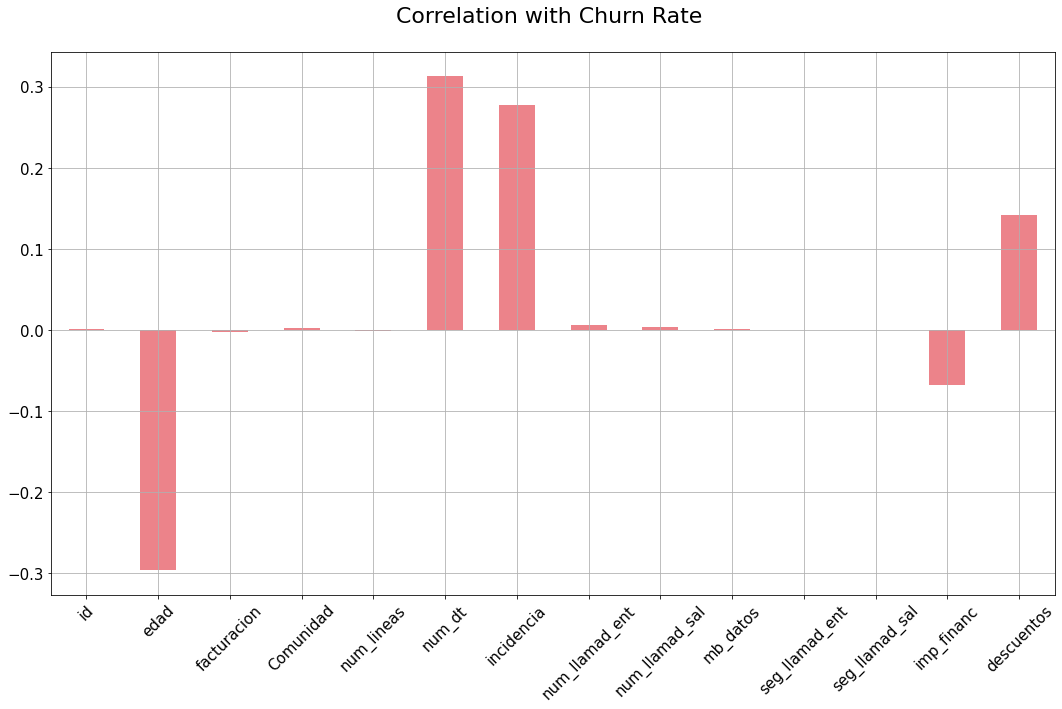

In [ ]:
correlations = df_churn.corrwith(df_churn['Fuga'])
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

<AxesSubplot:>

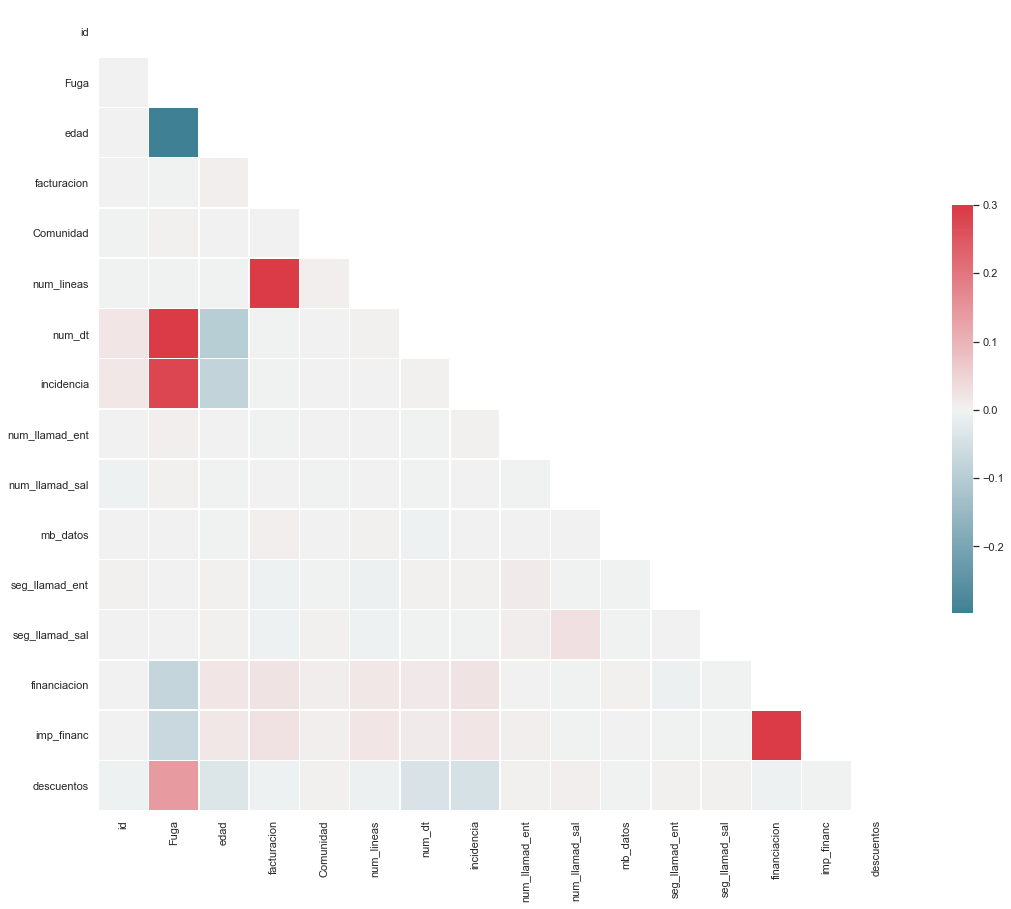

In [ ]:
## Set and compute the Correlation Matrix
sn.set(style="white")
corr = df_churn.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Muestreo de Datos

In [103]:
response = df_churn["Fuga"]
df_churn = df_churn.drop(columns="Fuga")

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df_churn, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (76373, 18)
Number transactions y_train dataset:  (76373,)
Number transactions X_test dataset:  (19094, 18)
Number transactions y_test dataset:  (19094,)


In [119]:

train_identity = X_train['id']
X_train = X_train.drop(columns = ['id'])

test_identity = X_test['id']
X_test = X_test.drop(columns = ['id'])

In [129]:
from sklearn.preprocessing import StandardScaler 

In [130]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

## Seleccion de Modelos

### Regresión logística

In [131]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

matriz de confusión
[[17559   118]
 [  789   628]]
accuracy
0.952498166963444
precision
0.8418230563002681
recall
0.44318983768525055
f1
0.5806749884419787
AUC
0.7182572484234366


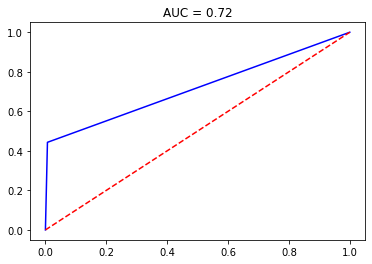

In [145]:
classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)
saca_metricas(y_test, y_pred)

### Árboles de decisión

matriz de confusión
[[17068   609]
 [  574   843]]
accuracy
0.9380433644076673
precision
0.5805785123966942
recall
0.5949188426252646
f1
0.5876612059951202
AUC
0.7802336477085139


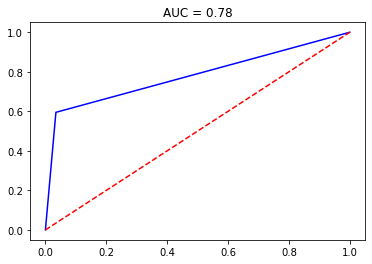

In [146]:
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_test)
saca_metricas(y_test, y_pred)

### Random Forest

matriz de confusión
[[17586    91]
 [  591   826]]
accuracy
0.9642819733947837
precision
0.9007633587786259
recall
0.5829216654904729
f1
0.7077977720651243
AUC
0.7888868665745061


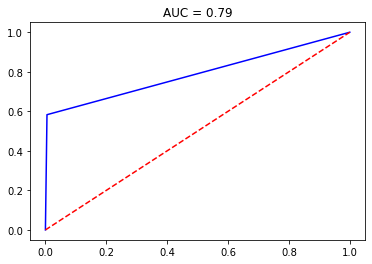

In [136]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred        = rf_classifier.predict(X_test)
saca_metricas(y_test, y_pred)

### Clustering

In [149]:
df_churn.shape

(95467, 18)

In [151]:
from sklearn.cluster import KMeans

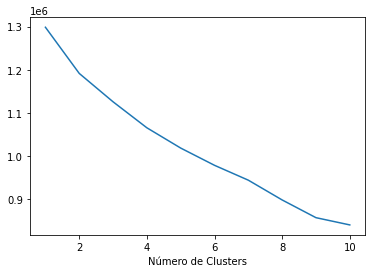

In [155]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.show()

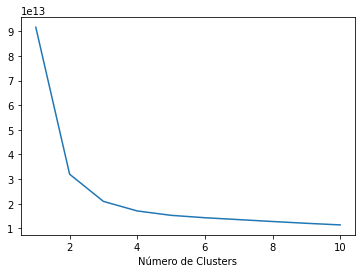

In [153]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_churn)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.show()

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [156]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

#Step 15.4.6. Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


In [157]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest  0.964125   0.900438  0.580805  0.706135  0.625190
0  Logistic Regression  0.952498   0.841823  0.443190  0.580675  0.489554
1        Decision Tree  0.939772   0.592516  0.603387  0.597902  0.601181


In [159]:
classifier

RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

### Importancia de las variables

In [144]:
feature_importances = pd.concat([pd.DataFrame(df_churn.drop(columns = 'id').columns, columns = ["variables"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,variables,coef
13,descuentos,3.020685
5,num_dt,0.799709
6,incidencia,0.696840
14,conexion,0.341159
15,vel_conexion,0.226205
1,facturacion,0.047120
7,num_llamad_ent,0.028896
3,Comunidad,0.028463
9,mb_datos,0.006354
8,num_llamad_sal,0.001840


El modelo de regresion logistica predice que el ratio de fuga incrementara con descuentos, num_dt, incidencia y en el caso contrario tiene una correlacion negativa con imp_financ, edad, TV.

# Mejorar el Modelo

#### Hyper parameter Tuning

In [166]:
grid_param = {
    'n_estimators': [100, 300, 500],
    'max_depth': [7,8,9]
}

In [167]:
model_grid = GridSearchCV(estimator=rf_classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [168]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [169]:
print(model_grid.best_params_)

{'max_depth': 9, 'n_estimators': 500}


In [170]:
print(model_grid.best_score_)

0.9640317834163807


In [172]:
classifier = RandomForestClassifier(n_estimators = 500, max_depth=10, random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=500, random_state=0)

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [175]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.964125   0.900438  0.580805  0.706135  0.625190
1  Logistic Regression  0.952498   0.841823  0.443190  0.580675  0.489554
2        Decision Tree  0.939772   0.592516  0.603387  0.597902  0.601181
3        Random Forest  0.964125   0.900438  0.580805  0.706135  0.625190


# Predicion

In [177]:
classifier.predict(df_enero)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [176]:
df_churn

,id,edad,facturacion,antiguedad,Comunidad,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,403,17,5,0.0,0.0,110,79,10897,12806,13751,0.000000,1.0,1,50,1.0
1,2,84,255.830842,861,8,3,0.0,0.0,189,89,18657,6499,10862,0.000000,0.0,1,600,1.0
2,3,66,135.768153,6578,9,4,0.0,0.0,129,30,15511,17013,16743,0.000000,0.0,2,35,1.0
3,4,69,255.658527,1606,5,4,0.0,0.0,51,52,12670,3393,6771,0.000000,1.0,1,200,2.0
4,5,30,22.302845,8159,2,2,2.0,0.0,183,3,23756,18436,4485,0.000000,1.0,2,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95462,99995,65,173.741667,301,10,5,0.0,0.0,121,98,13403,6197,6853,23.138779,1.0,2,35,2.0
95463,99996,36,215.890326,2457,9,3,0.0,0.0,98,13,5291,3684,1667,0.000000,1.0,2,30,1.0
95464,99997,68,285.890750,5989,14,5,0.0,0.0,226,20,20002,572,5679,14.616422,1.0,1,200,1.0
95465,99998,20,383.167610,2470,8,4,0.0,0.0,126,26,16448,833,14398,0.000000,1.0,2,20,1.0
